Let’s analyze the "Second Hand Car Price Prediction" dataset from Kaggle. We’ll start with data preprocessing, handling missing values and outliers to clean the dataset. Next, we’ll perform feature engineering to create new impactful features. Using the refined dataset, we’ll build machine learning models to predict car prices based on features like Brand, Model, Year, and Fuel Type. We’ll then evaluate the models, compare their prediction accuracy, and identify the best-performing approach. Finally, we’ll use scatter plots to visualize the actual vs. predicted prices and understand the variations.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from warnings import filterwarnings
filterwarnings('ignore')

# Data Description and Data Pre-Processing 

In [7]:
df=pd.read_csv('/Users/naeem/Downloads/cars.csv')
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [9]:
df.describe()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,50.500000,2018.39000,28150.000000,17.210000,1855.230000,158.130000,5.230000,1.574000e+06
std,29.011492,1.17116,9121.375716,3.309902,631.311475,76.968137,0.750151,1.000265e+06
min,1.000000,2016.00000,10000.000000,10.000000,999.000000,68.000000,4.000000,4.500000e+05
25%,25.750000,2017.75000,22000.000000,15.000000,1462.000000,103.000000,5.000000,7.000000e+05
50%,50.500000,2018.00000,27000.000000,17.000000,1774.000000,148.000000,5.000000,1.300000e+06
75%,75.250000,2019.00000,32000.000000,19.000000,2143.000000,187.000000,5.000000,2.500000e+06
max,100.000000,2021.00000,60000.000000,25.000000,4951.000000,396.000000,7.000000,4.000000e+06


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [13]:
df.shape

(100, 13)

In [15]:
df.isnull().sum()

Car_ID               0
Brand                0
Model                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [17]:
df.drop_duplicates()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,2900000
96,97,Toyota,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7,1400000
97,98,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000
98,99,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000


In [19]:
df.value_counts()

Car_ID  Brand       Model     Year  Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  Mileage  Engine  Power  Seats  Price  
1       Toyota      Corolla   2018  50000              Petrol     Manual        First       15       1498    108    5      800000     1
64      Volkswagen  Passat    2017  32000              Diesel     Automatic     Second      17       1968    174    5      1600000    1
74      Volkswagen  Ameo      2020  15000              Petrol     Automatic     Third       19       1197    74     5      500000     1
73      Honda       WR-V      2018  28000              Diesel     Manual        First       25       1498    98     5      750000     1
72      Maruti      Vitara    2019  24000              Petrol     Manual        Second      17       1462    103    5      700000     1
                                                                                                                                     ..
31      Ford        Aspire    2019  26000            

In [37]:
categorical_columns = df.select_dtypes(include=["object"]).columns.tolist()
for col in categorical_columns:
    print(df[col].value_counts())
    print("\n")

Brand
Ford          11
Hyundai       11
Tata          11
Toyota        10
Volkswagen    10
Audi          10
BMW           10
Mercedes      10
Honda          6
Maruti         6
Mahindra       5
Name: count, dtype: int64


Model
Mustang          3
Altroz           3
C-Class          3
Verna            3
Fortuner         2
S-Cross          2
Vitara           2
WR-V             2
Ameo             2
A3               2
7 Series         2
GLE              2
Yaris            2
Ranger           2
Santro           2
Tigor            2
T-Roc            2
BR-V             2
Elantra          2
Q7               2
X5               2
GLA              2
Camry            2
Venue            2
Tiago            2
XUV300           2
Vento            2
A5               2
3 Series         2
Innova Crysta    2
Safari           2
EcoSport         2
Aspire           2
E-Class          2
X3               2
A6               2
Passat           2
Thar             2
Creta            1
Swift            1
Sonata       

In [25]:
# Delete the Car_ID column, since the purpose of it is only ordering the rows
df.drop(['Car_ID'], axis=1, inplace=True)
df.head()

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


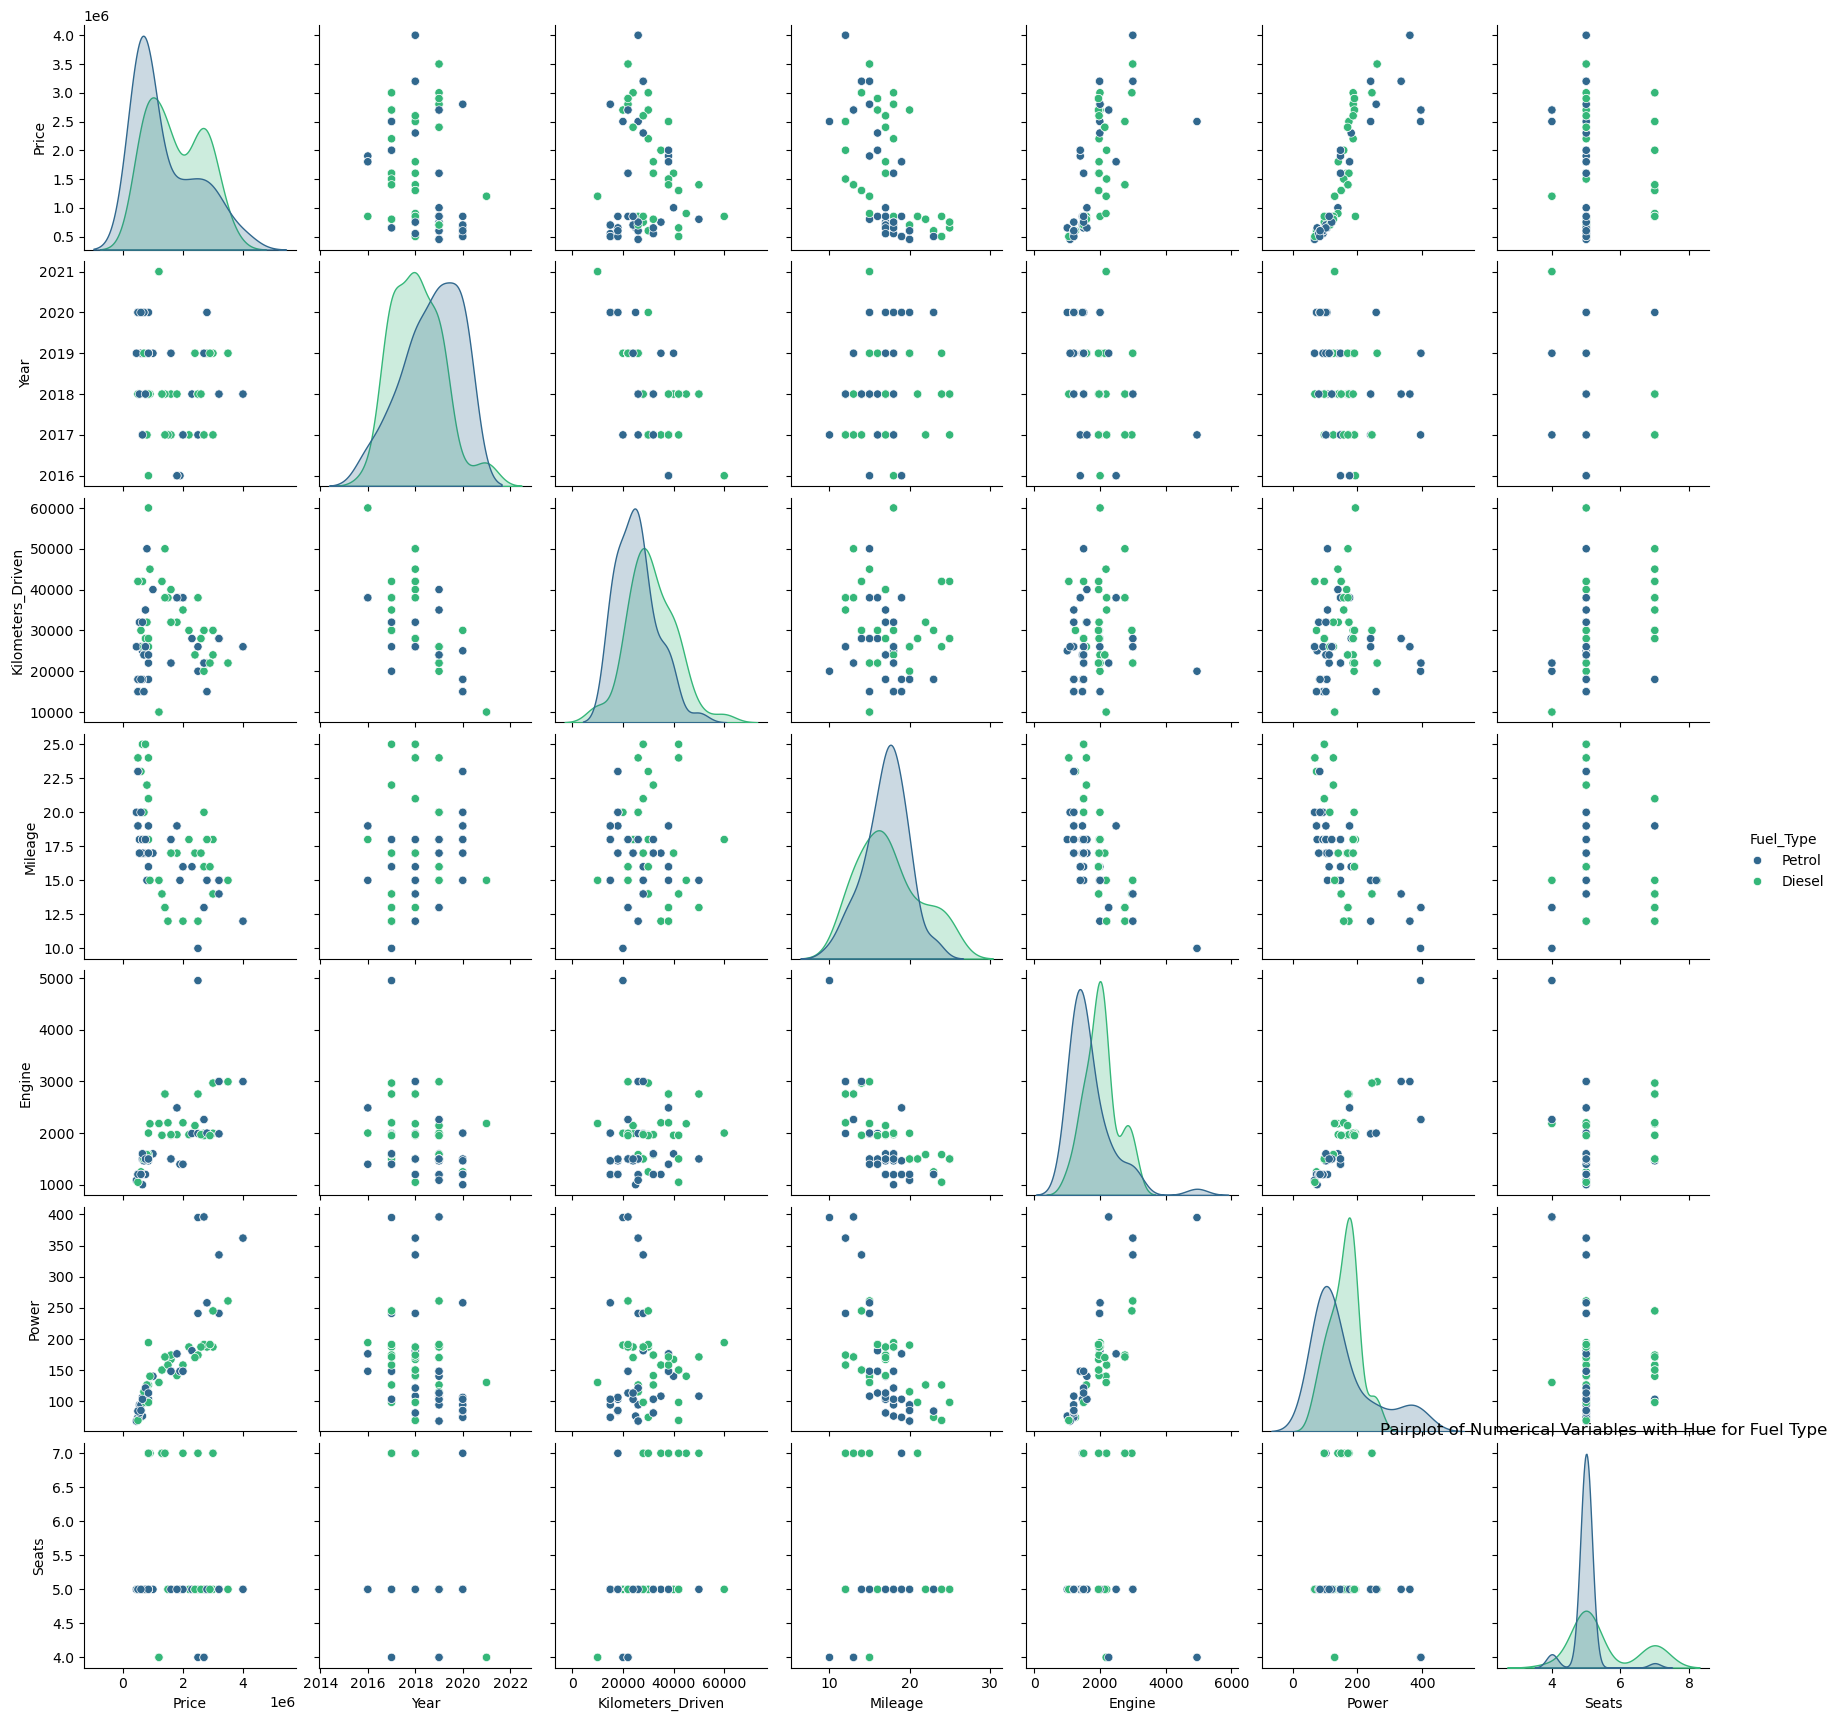

In [29]:
columns_to_include = ['Price', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Fuel_Type']
sns.pairplot(df[columns_to_include], hue='Fuel_Type', palette='viridis')
plt.title('Pairplot of Numerical Variables with Hue for Fuel Type')
plt.show()

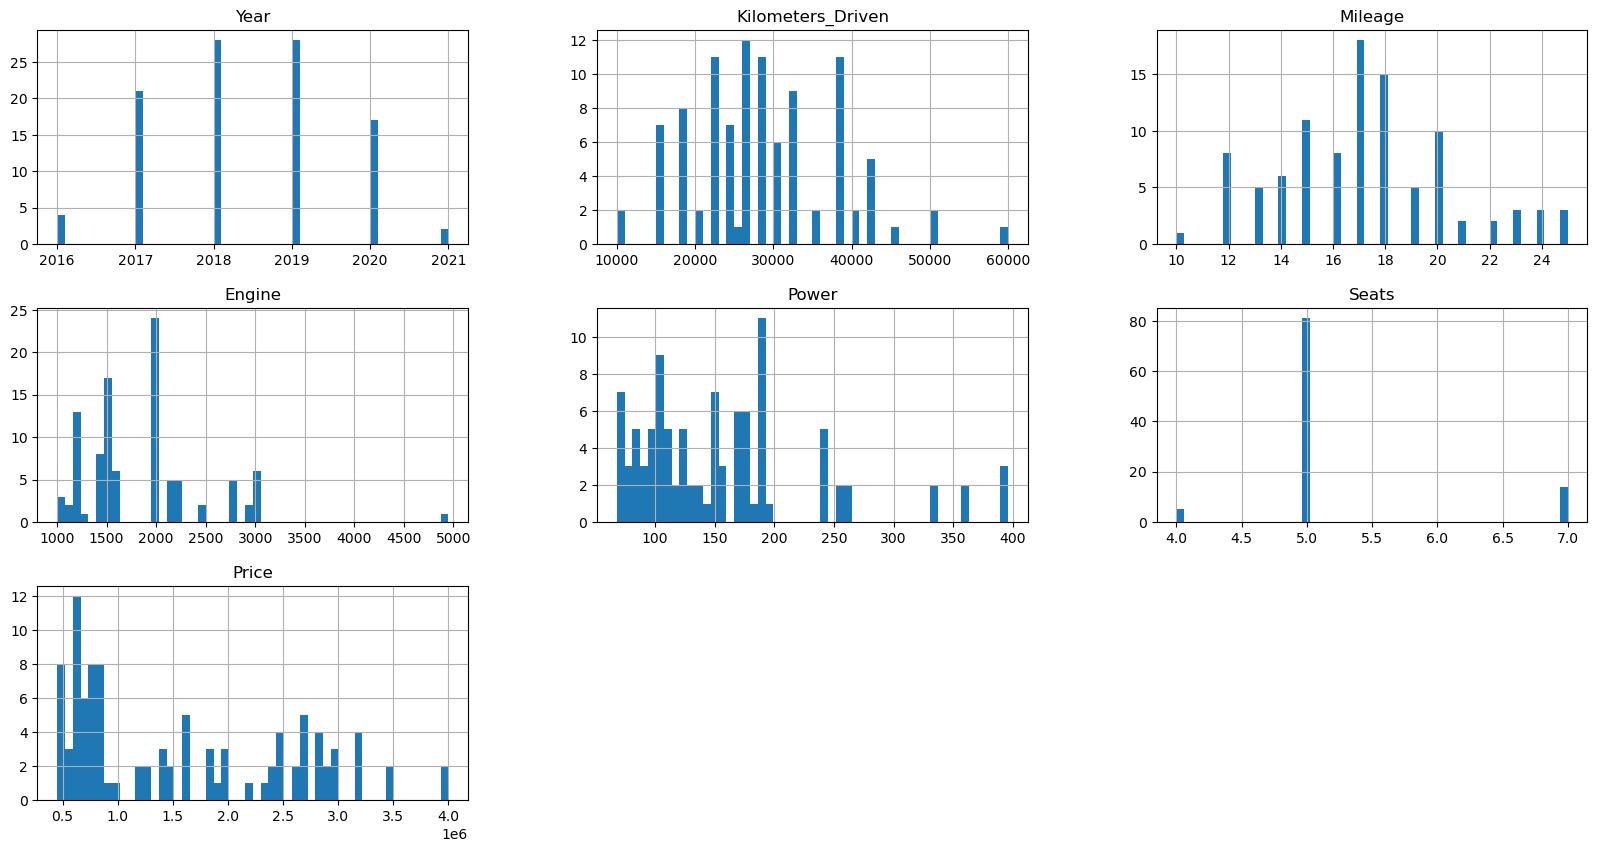

In [31]:
df.hist(figsize=(20,10),bins = 50)
plt.show()



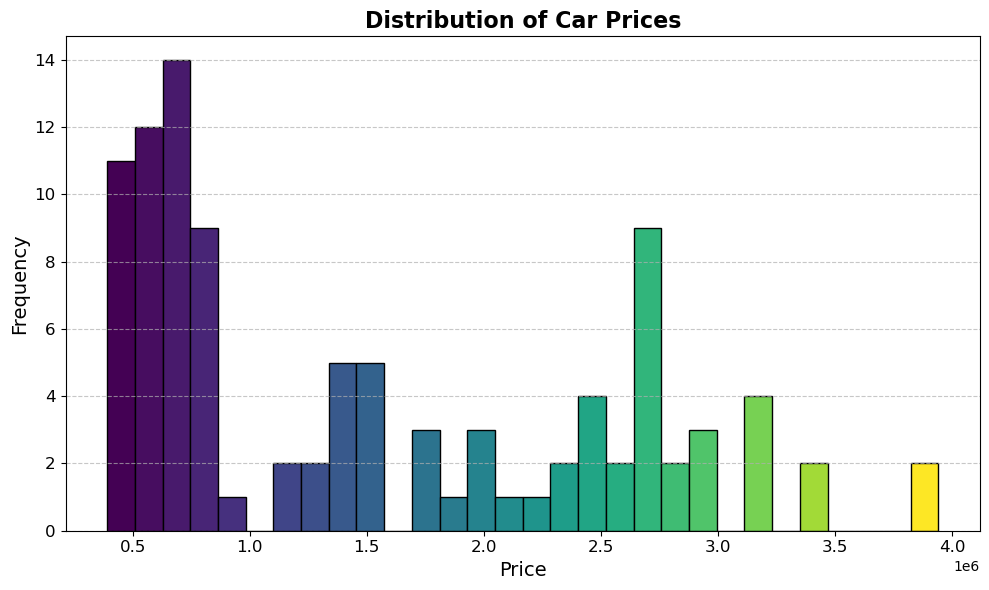

In [49]:
data = df['Price']
bins = 30  
hist, bin_edges = np.histogram(data, bins=bins)

colors = plt.cm.viridis(np.linspace(0, 1, bins))

plt.figure(figsize=(10, 6))
for i in range(len(hist)):
    plt.bar(bin_edges[i], hist[i], width=bin_edges[i + 1] - bin_edges[i], color=colors[i], edgecolor='black')

plt.title('Distribution of Car Prices', fontsize=16, fontweight='bold')
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

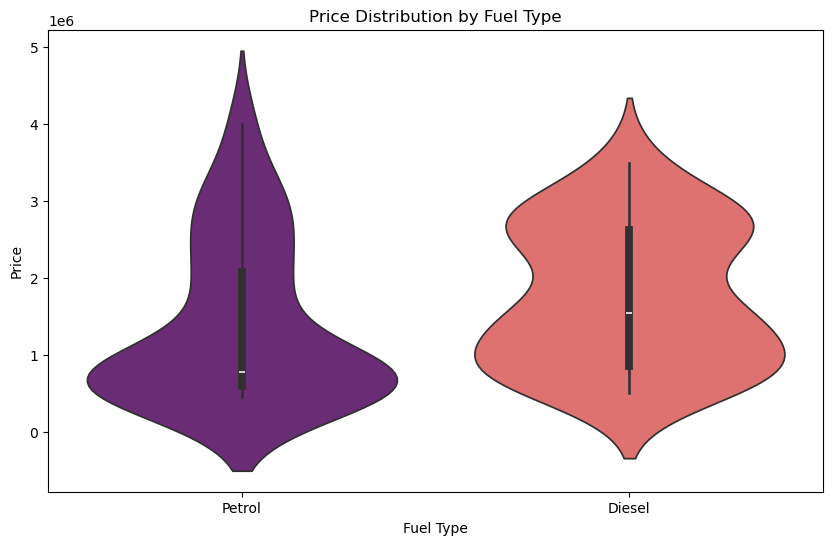

In [55]:
# Plot the count of cars in each segment
#  Violin plot of Price vs. Fuel_Type
plt.figure(figsize=(10, 6))
sns.violinplot(x='Fuel_Type', y='Price', data=df,palette="magma")
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

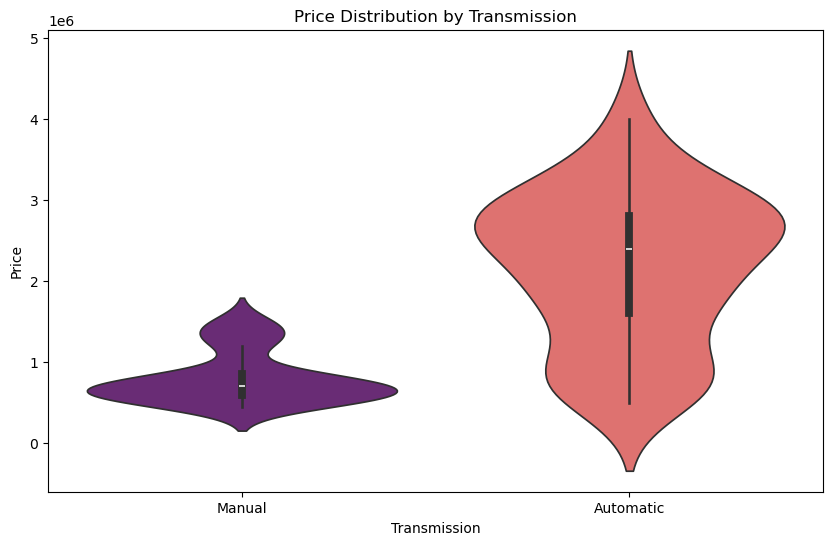

In [57]:
# Violin plot for Transmission
plt.figure(figsize=(10, 6))
sns.violinplot(x='Transmission', y='Price', data=df,palette="magma")
plt.title('Price Distribution by Transmission')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.show()

## The violin plot indicates that cars with automatic transmission tend to have a broader price range and higher median prices compared to manual transmission cars, which show a more compact price distribution. This suggests that automatic cars are generally more expensive.

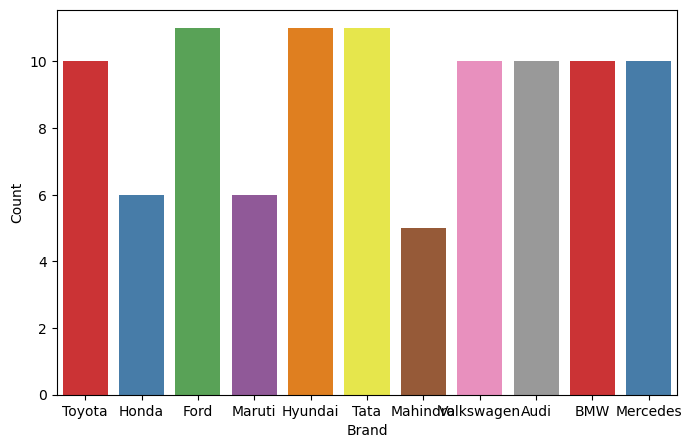

In [60]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Brand', data=df,palette='Set1')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

## This bar chart illustrates the number of cars available for each brand. Brands like Toyota, Ford, Hyundai, Tata, Volkswagen, Audi, BMW, and Mercedes have higher counts, whereas Mahindra has the fewest.

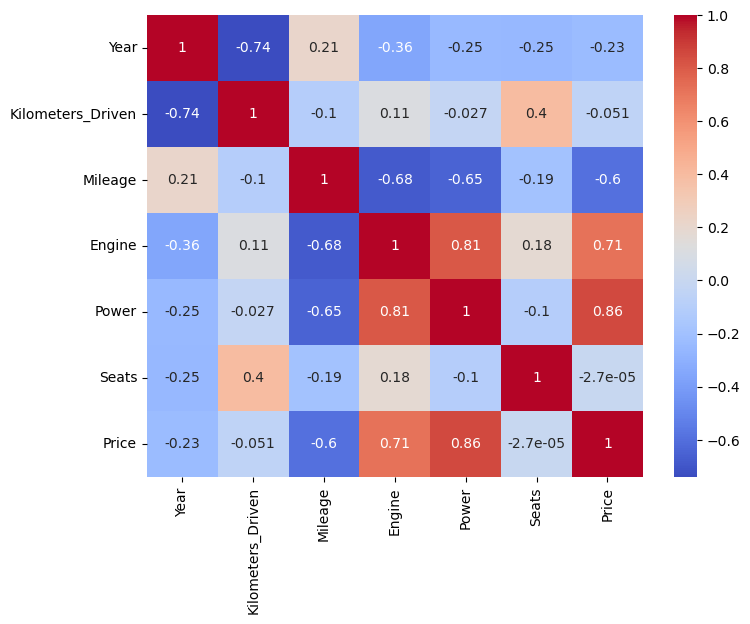

In [66]:

num_cols = df.select_dtypes(exclude='object').columns
corr = df[num_cols].corr()  
plt.figure(figsize=(8,6))  
sns.heatmap(corr, annot=True, cmap='coolwarm')  
plt.show()

## Price shows a strong positive correlation with Power (0.86) and Engine (0.71), highlighting that these features play a significant role in determining car prices.
## Mileage is negatively correlated with Engine (-0.68) and Power (-0.65), indicating a trade-off between fuel efficiency and performance.
## Year and Kilometers Driven have a weak correlation with Price, suggesting they have a smaller impact on pricing compared to other factors.

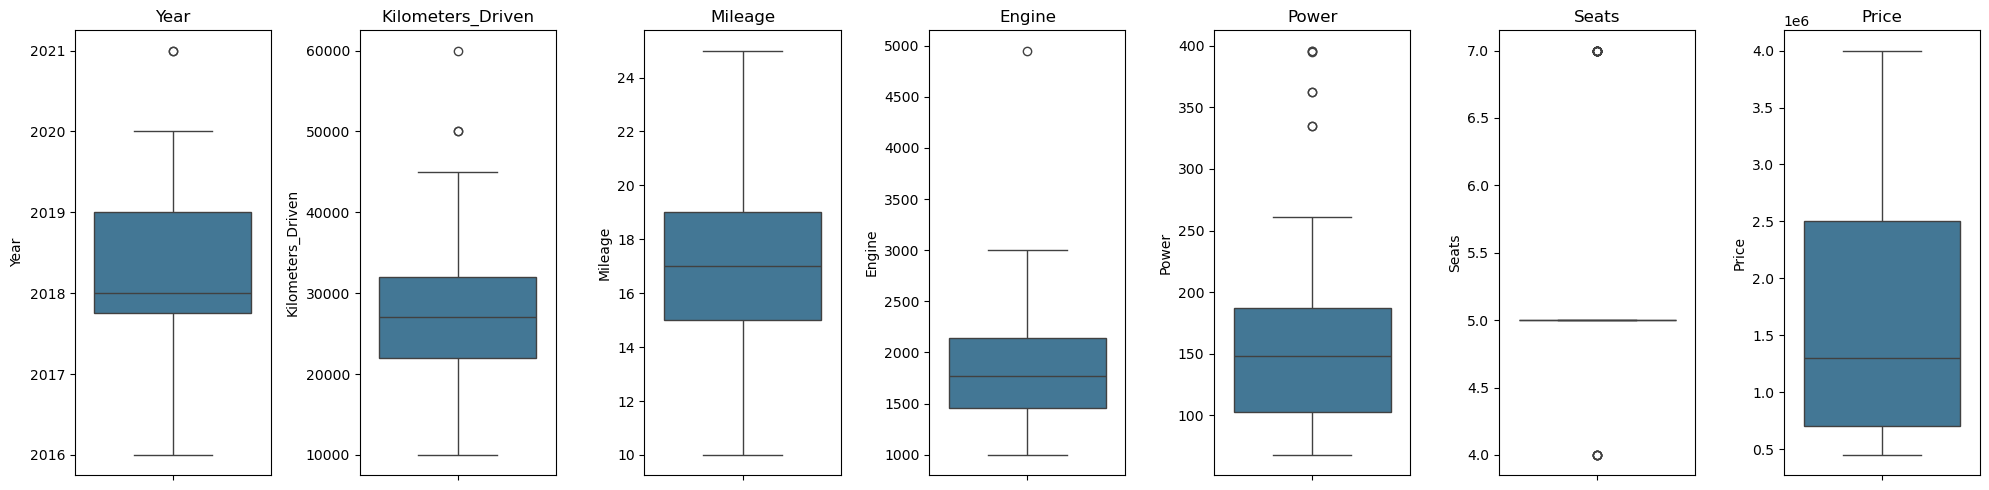

In [68]:
boxplot_columns = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
fig, axes = plt.subplots(1, 7, figsize=(20, 5))
for i, column in enumerate(boxplot_columns):
    sns.boxplot(y=df[column], ax=axes[i], palette='mako')
    axes[i].set_title(column)
plt.tight_layout()
plt.show()

There were outliers observed in some features like Kilometers_Driven, Engine , Power and Seats

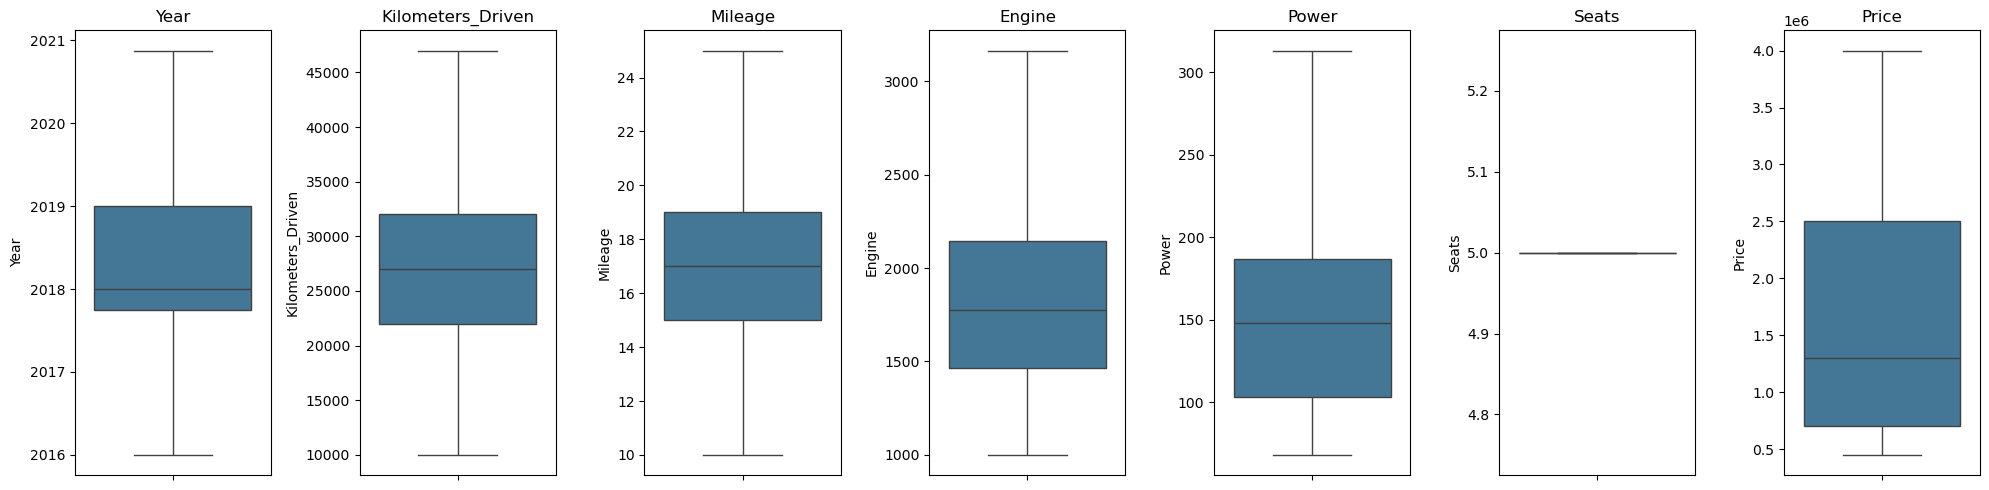

In [72]:
def handle_outliers_iqr(df):
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df
df2 = handle_outliers_iqr(df)

boxplot_columns = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
fig, axes = plt.subplots(1, 7, figsize=(20, 5))
for i, column in enumerate(boxplot_columns):
    sns.boxplot(y=df2[column], ax=axes[i], palette='mako')
    axes[i].set_title(column)
plt.tight_layout()
plt.show()

In [74]:
preprocessor = ColumnTransformer(
    transformers=[
        ('tnf1',OrdinalEncoder(categories=[['First','Second','Third']]),['Owner_Type']),
        ('tnf2', OneHotEncoder(sparse_output=False,drop='first'), ['Brand','Model','Fuel_Type','Transmission'])
    ]
)
df2_1 = preprocessor.fit_transform(df2)
df3 = pd.DataFrame(df2_1, columns=preprocessor.get_feature_names_out())
df3.columns = df3.columns.str.replace('cat_', '')
df3.head()


,tnf1__Owner_Type,tnf2__Brand_BMW,tnf2__Brand_Ford,tnf2__Brand_Honda,tnf2__Brand_Hyundai,tnf2__Brand_Mahindra,tnf2__Brand_Maruti,tnf2__Brand_Mercedes,tnf2__Brand_Tata,tnf2__Brand_Toyota,...,tnf2__Model_Verna,tnf2__Model_Vitara,tnf2__Model_WR-V,tnf2__Model_X1,tnf2__Model_X3,tnf2__Model_X5,tnf2__Model_XUV300,tnf2__Model_Yaris,tnf2__Fuel_Type_Petrol,tnf2__Transmission_Manual
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
df_remaining = df[['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']]

In [78]:
df_final = pd.concat([df_remaining, df3], axis=1)

# Applying the Model 

In [80]:
X=df_final.drop(['Price'],axis=1)
Y=df_final[['Price']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42, shuffle =True)

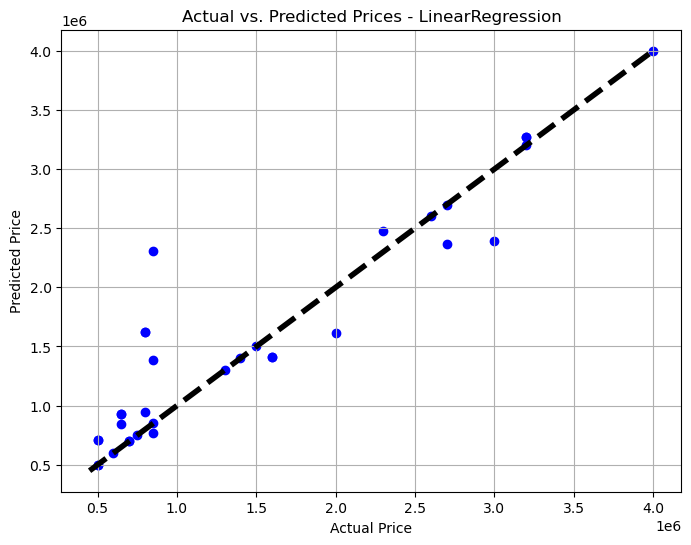

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

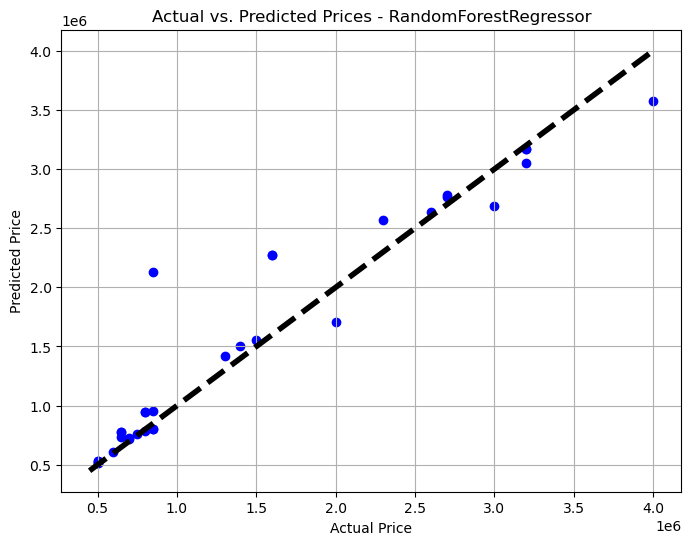

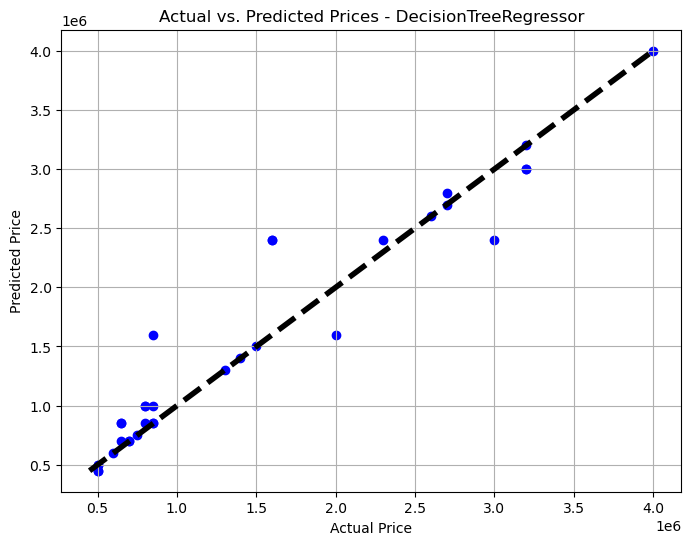

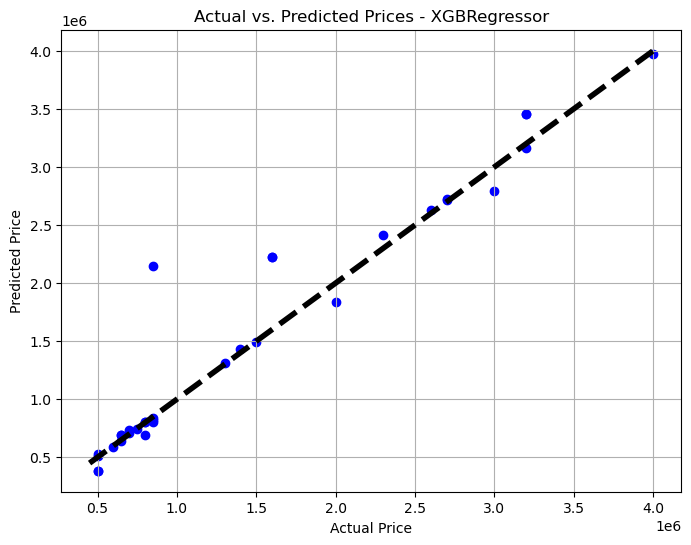

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

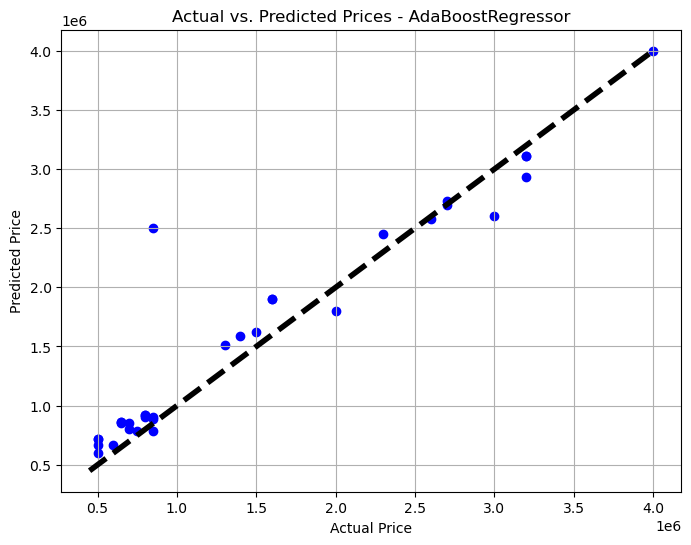

                   model                                        best_params  \
0       LinearRegression                           {'fit_intercept': False}   
1  RandomForestRegressor           {'max_depth': None, 'n_estimators': 150}   
2  DecisionTreeRegressor          {'max_depth': 10, 'min_samples_split': 2}   
3           XGBRegressor  {'learning_rate': 0.3, 'max_depth': 3, 'n_esti...   
4      AdaBoostRegressor          {'learning_rate': 2, 'n_estimators': 300}   

     best_score           mse       rmse    r2  
0 -7.196068e+10  1.469919e+11  383395.18  0.86  
1 -8.940085e+10  9.502646e+10  308263.63  0.91  
2 -1.124574e+11  8.045455e+10  283645.10  0.92  
3 -1.011322e+11  8.260509e+10  287411.01  0.92  
4 -9.977749e+10  1.111506e+11  333392.59  0.89  


In [82]:

models_and_params = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False],
        }
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [50, 100, 150, 200, 300],
            'max_depth': [None, 5, 10, 15, 20],
        }
    },
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [None, 5, 10, 15, 20],
            'min_samples_split': [2, 5, 10, 15],
        }
    },
    'XGBRegressor': {
        'model': XGBRegressor(eval_metric='rmse'),
        'params': {
            'n_estimators': [50, 100, 150, 200],
            'max_depth': [3, 5, 7, 9],
            'learning_rate': [0.01, 0.1, 0.2, 0.3]
        }
    },
    'AdaBoostRegressor': {
        'model': AdaBoostRegressor(),
        'params': {
            'n_estimators': [50, 100, 200, 300],
            'learning_rate': [0.1, 0.5, 1, 2]
        }
    }
}


results = []

for model_name, model_info in models_and_params.items():
    model = model_info['model']
    params = model_info['params']
    grid = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    results.append({
        'model': model_name,
        'best_params': grid.best_params_,
        'best_score': grid.best_score_,
        'mse': mse,
        'rmse': rmse,
        'r2': r2,
    })
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue')  # Scatter plot of actual vs predicted
    plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)  # Diagonal line where actual = predicted
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs. Predicted Prices'+' - '+model_name)
    plt.grid(True)
    plt.show()
results_df = pd.DataFrame(results)
results_df = results_df.round({'best_score': 2, 'mse': 2, 'rmse': 2, 'r2': 2})
print(results_df[['model', 'best_params', 'best_score', 'mse', 'rmse', 'r2']])



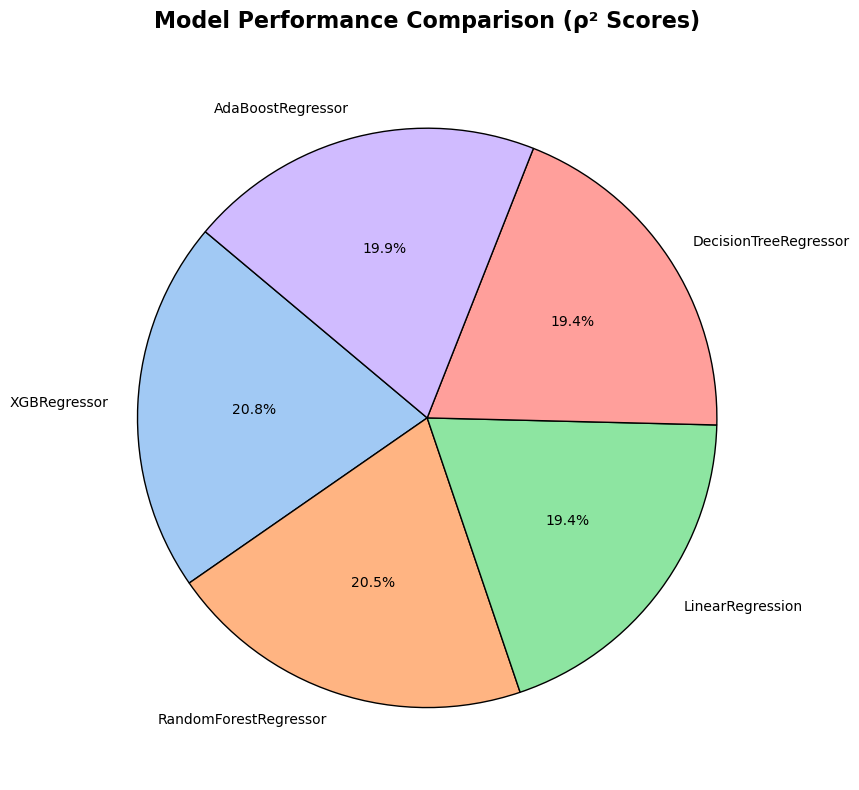

In [89]:
model_performance = {
    'XGBRegressor': 0.92,
    'RandomForestRegressor': 0.91,
    'LinearRegression': 0.86,
    'DecisionTreeRegressor': 0.86,
    'AdaBoostRegressor': 0.88
}

labels = model_performance.keys()
sizes = model_performance.values()
colors = sns.color_palette('pastel', len(labels))

plt.figure(figsize=(10, 8))
plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Model Performance Comparison (\u03C1\u00b2 Scores)', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## Prediction Accuracy Analysis:

The XGBRegressor emerges as the top-performing model, achieving the lowest RMSE (287,411.01) and the highest 
R
2
R 
2
  score (0.92), demonstrating exceptional prediction accuracy and reliability.

The RandomForestRegressor follows closely with a slightly lower performance (
R
2
R 
2
  = 0.91, RMSE = 310,770.09) but remains a strong competitor.

Both LinearRegression and DecisionTreeRegressor show weaker performance (
R
2
R 
2
  = 0.86), making them less suitable for this task.

The AdaBoostRegressor offers moderate performance but falls behind XGB and RandomForest in terms of accuracy.

## hence we can say, XGBoost Regressor is the best model for this dataset.